In [1]:
from dataset import get_area, get_border
from pinn import PINNModel
from models import model1
from accuracy import AccuracyCalc
import tensorflow as tf
from model_info import ModelInfo

2024-10-09 22:17:45.005498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 22:17:45.018337: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 22:17:45.022072: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 22:17:45.032370: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 22:17:45.739675: W tensorflow/compiler/tf2

In [2]:
# force gpu use
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

In [3]:
grid_size = (50, 50)
plotting_grid_size = (200, 200)
x_limits = (0, 2)
y_limits = (0, 2)
border_grid_size = (50, 50)

EPOCHS = 4000
EPRINT = 500
LOSS = 1e-3 # 1e-4

In [4]:
area = get_area(grid_size, x_limits, y_limits)
border = get_border(border_grid_size, x_limits, y_limits)

model = PINNModel(model1(), optm = tf.keras.optimizers.Adam(learning_rate=0.001))
model.train(1, area, border, EPOCHS, LOSS, EPRINT)

epoch: 0 loss: 101.988594
epoch: 500 loss: 0.265801
epoch: 1000 loss: 0.0490725935
epoch: 1500 loss: 0.0192459729
epoch: 2000 loss: 0.0108851353
epoch: 2500 loss: 0.006763204
epoch: 3000 loss: 0.00487387879
epoch: 3500 loss: 0.00389654795


In [5]:
import numpy as np


def real_u(area):
    area = np.array(area)
    if len(area.shape) >= 3:
        x = area[0]
        y = area[1]
        return np.sin(np.pi * x) * np.sin(np.pi * y)
    else:
        return np.array([np.sin(np.pi * x) * np.sin(np.pi * y) for x, y in area])

# pred_coord = list()
# for _x in x[0]:
#     for _y in x[0]:
#         pred_coord.append([_x, _y])
# pred_u = model.predict(np.array(pred_coord)).ravel().reshape(plotting_grid_size[0], plotting_grid_size[1])
calc = AccuracyCalc(model._model, real_u, area=area)
print("Error:", calc.mse())
print("Error:", calc.maxe())

I0000 00:00:1728501480.272032   36627 service.cc:146] XLA service 0x7ff120007d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728501480.272053   36627 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-10-09 22:18:00.285204: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step 
Error: 5.467979210155819e-05
Error: 0.03053257210648394


I0000 00:00:1728501480.631330   36627 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [6]:
info = ModelInfo(model._model, real_u, (x_limits, y_limits), grid_size)
print(info.border_error_calc.mse())
print(info.error_calc.mse())

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
0.00022696644451478037
6.818706565075481e-05


   1/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step

/home/arnautov/projectPractice/pinn_puasson/src/plotting.py:81: UserWarning: The following kwargs were not used by contour: 'linestyle'
  real.contour(
/home/arnautov/projectPractice/pinn_puasson/src/plotting.py:102: UserWarning: The following kwargs were not used by contour: 'linestyle'
  pred.contour(
/home/arnautov/projectPractice/pinn_puasson/src/plotting.py:132: UserWarning: The following kwargs were not used by contour: 'linestyle'
  diff.contour(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step


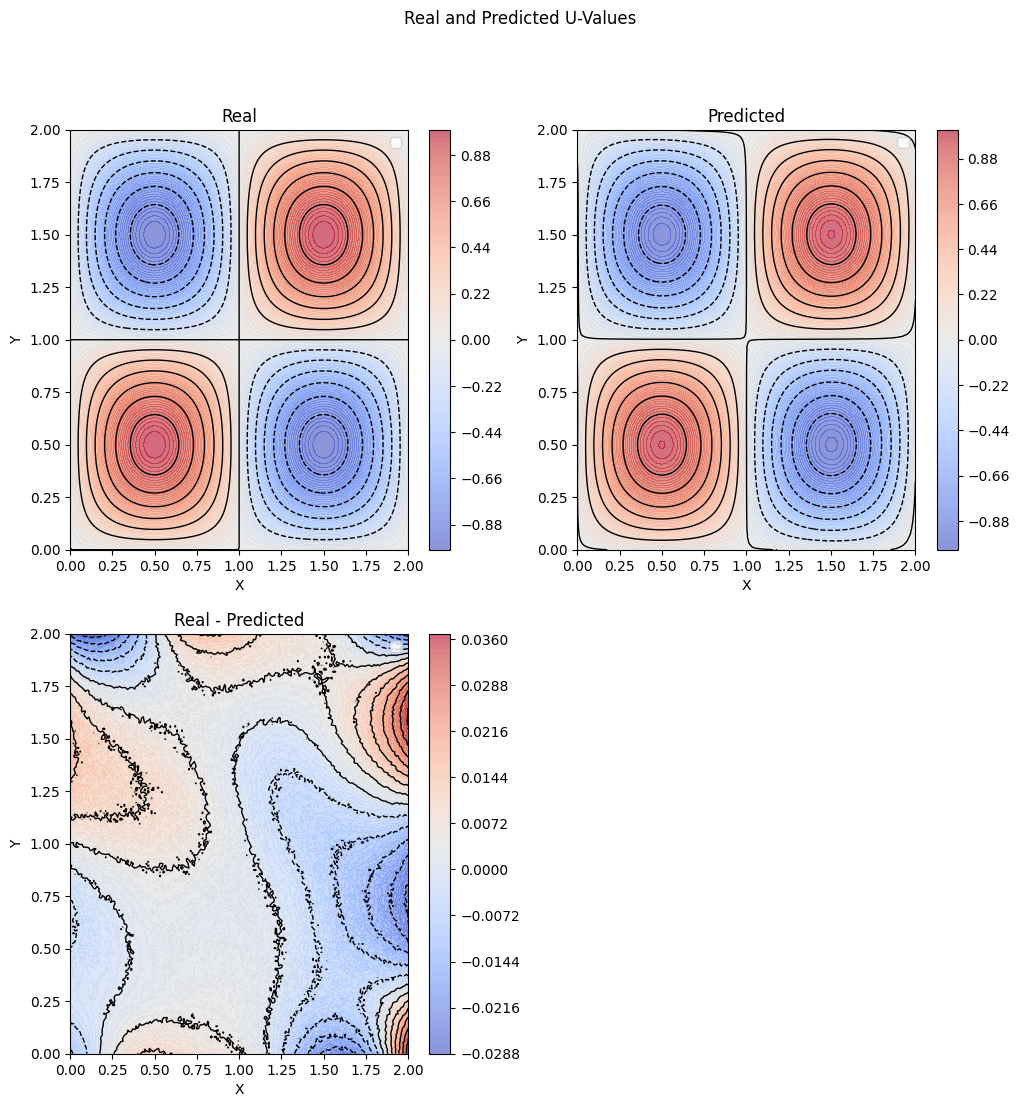

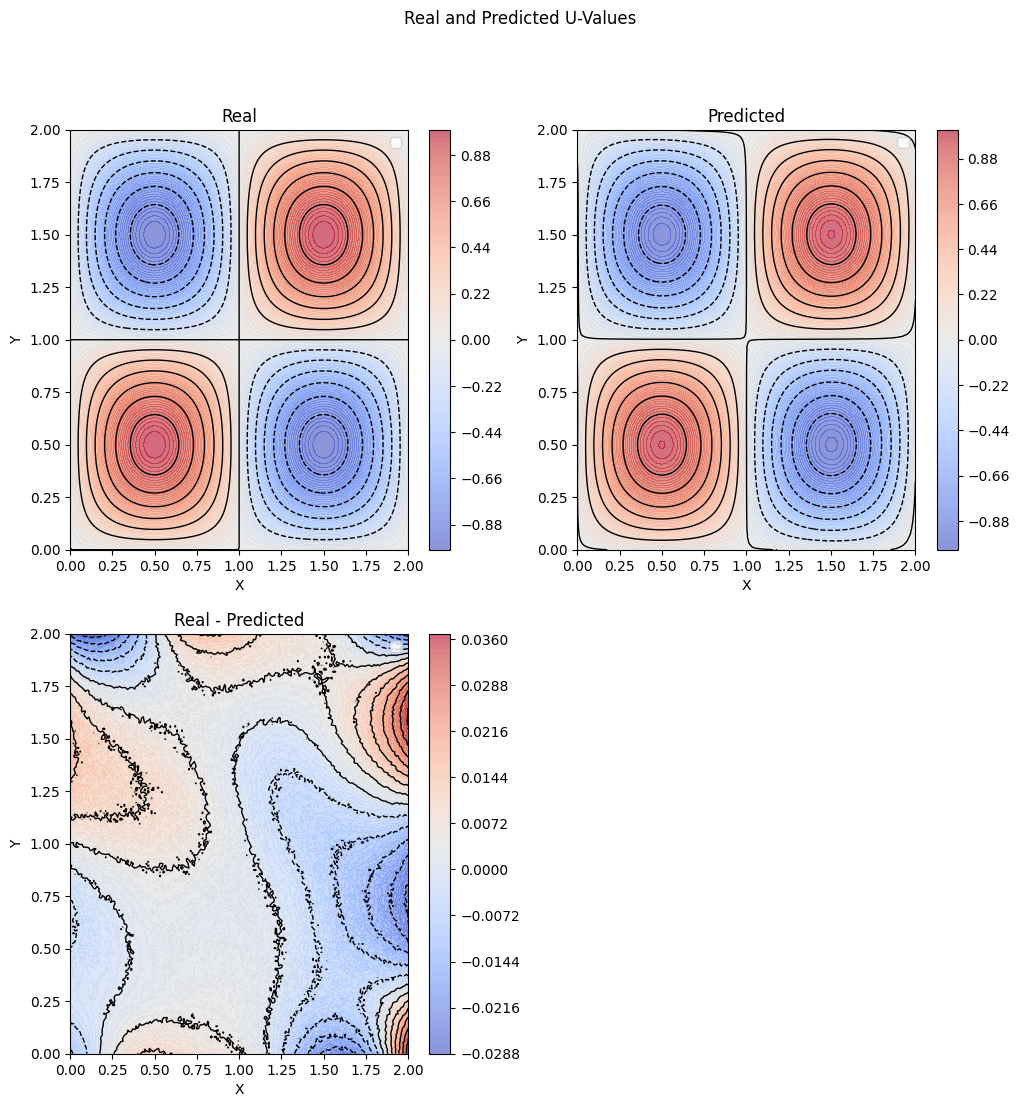

In [8]:
info.plotter.plot2d_contour()
info.change_plotter(grid_size=(200, 200))
info.plotter.plot2d_contour()
